In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Wczytanie i przygotowanie danych

In [2]:
cols = [
    "white_king_file","white_king_rank",
    "white_rook_file","white_rook_rank",
    "black_king_file","black_king_rank",
    "white_depth_of_win"
]

df = pd.read_csv("krkopt.data", names=cols)


In [3]:
file_map = {c: i+1 for i, c in enumerate("abcdefgh")}
for c in ["white_king_file", "white_rook_file", "black_king_file"]:
    df[c] = df[c].map(file_map)

In [4]:
depth_map = {
    "draw": -1,
    "zero": 0, "one": 1, "two": 2, "three": 3, "four": 4,
    "five": 5, "six": 6, "seven": 7, "eight": 8, "nine": 9,
    "ten": 10, "eleven": 11, "twelve": 12, "thirteen": 13,
    "fourteen": 14, "fifteen": 15, "sixteen": 16
}
df["white_depth_of_win"] = df["white_depth_of_win"].map(depth_map)

Pytanie 1

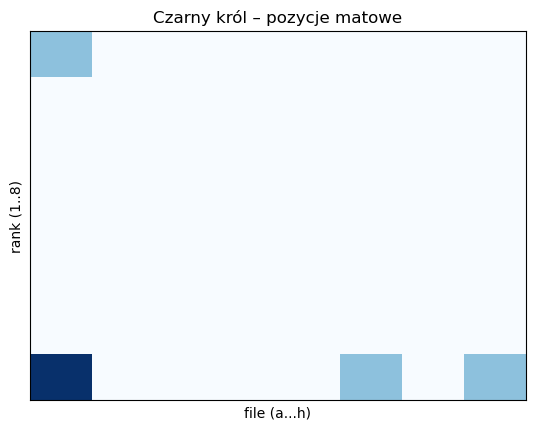

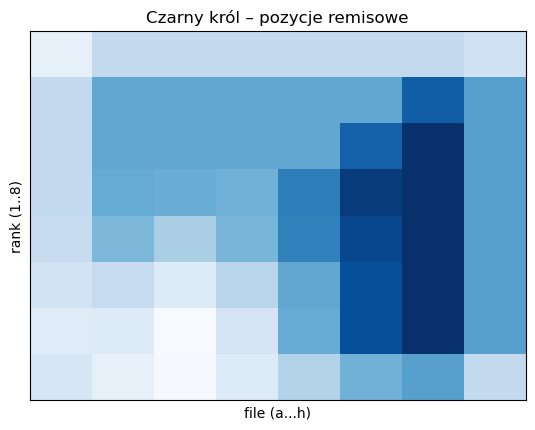

Komentarz P1:
- Mat (0): czarny król zwykle jest przy krawędziach/narożnikach.
- Remis (-1): czarny król częściej jest bliżej środka planszy.



In [15]:
mate = df[df["white_depth_of_win"] == 0]
draw = df[df["white_depth_of_win"] == -1]

plt.figure()
plt.hist2d(mate["black_king_file"], mate["black_king_rank"], bins=8, cmap="Blues")
plt.title("Czarny król – pozycje matowe")
plt.xlabel("file (a...h)")
plt.ylabel("rank (1..8)")
plt.xticks([])
plt.yticks([])
plt.show()

plt.figure()
plt.hist2d(draw["black_king_file"], draw["black_king_rank"], bins=8, cmap="Blues")
plt.title("Czarny król – pozycje remisowe")
plt.xlabel("file (a...h)")
plt.ylabel("rank (1..8)")
plt.xticks([])
plt.yticks([])
plt.show()

print("Komentarz P1:")
print("- Mat (0): czarny król zwykle jest przy krawędziach/narożnikach.")
print("- Remis (-1): czarny król częściej jest bliżej środka planszy.\n")


Pytanie 2

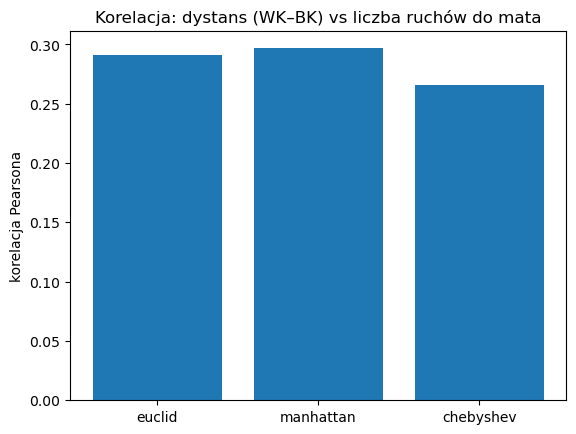

Komentarz P2:
- Najsilniejsza korelacja: manhattan (wartość: 0.297).
- Tę metrykę można uznać za najlepszy pojedynczy predyktor liczby ruchów.



In [6]:
nd = df[df["white_depth_of_win"] >= 0].copy()

dx = nd["white_king_file"] - nd["black_king_file"]
dy = nd["white_king_rank"] - nd["black_king_rank"]

nd["euclid"] = np.sqrt(dx*dx + dy*dy)
nd["manhattan"] = np.abs(dx) + np.abs(dy)
nd["chebyshev"] = np.maximum(np.abs(dx), np.abs(dy))

corrs = {
    "euclid": nd["euclid"].corr(nd["white_depth_of_win"]),
    "manhattan": nd["manhattan"].corr(nd["white_depth_of_win"]),
    "chebyshev": nd["chebyshev"].corr(nd["white_depth_of_win"]),
}

plt.figure()
plt.bar(list(corrs.keys()), list(corrs.values()))
plt.title("Korelacja: dystans (WK–BK) vs liczba ruchów do mata")
plt.ylabel("korelacja Pearsona")
plt.show()

best = max(corrs, key=corrs.get)
print("Komentarz P2:")
print(f"- Najsilniejsza korelacja: {best} (wartość: {corrs[best]:.3f}).")
print("- Tę metrykę można uznać za najlepszy pojedynczy predyktor liczby ruchów.\n")

Pytanie 3

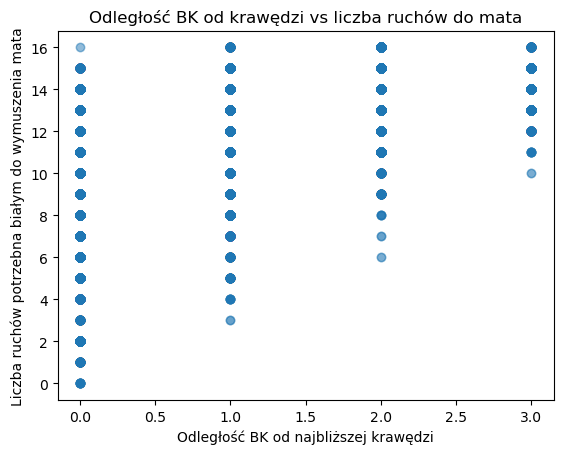

Komentarz P3:
- Korelacja odległości od krawędzi z liczbą ruchów: 0.508.
- Im bliżej krawędzi BK, tym zwykle szybciej kończy się gra.
- Dodanie tej cechy razem z dystansem WK–BK powinno poprawiać estymację.


In [ ]:
# Odległość czarnego króla od najbliższej krawędzi:
# min(file-1, 8-file, rank-1, 8-rank)
nd["bk_edge_dist"] = np.minimum.reduce([
    nd["black_king_file"] - 1,
    8 - nd["black_king_file"],
    nd["black_king_rank"] - 1,
    8 - nd["black_king_rank"]
])

plt.figure()
plt.scatter(nd["bk_edge_dist"], nd["white_depth_of_win"], alpha=0.2)
plt.title("Odległość BK od krawędzi vs liczba ruchów do mata")
plt.xlabel("Odległość BK od najbliższej krawędzi")
plt.ylabel("Liczba ruchów potrzebna białym do wymuszenia mata")
plt.show()

corr_edge = nd["bk_edge_dist"].corr(nd["white_depth_of_win"])
print("Komentarz P3:")
print(f"- Korelacja odległości od krawędzi z liczbą ruchów: {corr_edge:.3f}.")
print("- Im bliżej krawędzi BK, tym zwykle szybciej kończy się gra.")
print("- Dodanie tej cechy razem z dystansem WK–BK powinno poprawiać estymację.")
